In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

def vector_rejection(point, orig, norm):
    v = point - orig
    dist = np.dot(v, norm)
    return point - dist*norm.T

Find and plot orthogonal projection of vector onto a line in 2D to test the basic case. 

(-0.05, 1.05, -0.1, 2.1)

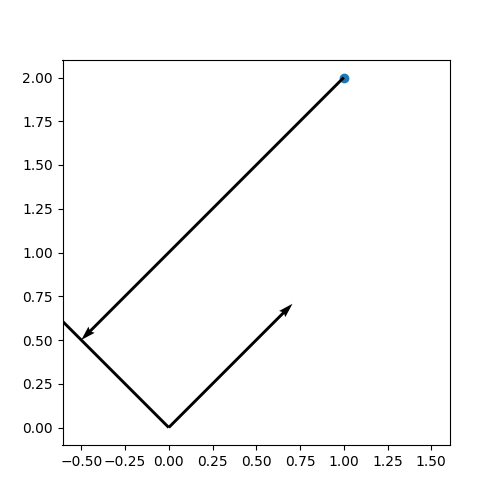

In [2]:
pt = np.array([[1, 2.0]])
v = np.array([0.5, 0.5])
unit_v = v/np.linalg.norm(v)
norm_v = np.array([-unit_v[1], unit_v[0]])

fig, ax = plt.subplots(figsize = (5, 5))


ax.quiver(0, 0, norm_v[0], norm_v[1], angles='xy', scale_units='xy', scale=1)
ax.quiver(0, 0, unit_v[0], unit_v[1],  angles='xy', scale_units='xy', scale=1)
ax.scatter(pt[0, 0], pt[0, 1])
plt.xlim([-2, 2])
plt.ylim([-2, 2])

v = norm_v - pt
dist = np.dot(v, unit_v)
rejection = dist*unit_v

ax.quiver(pt[0, 0], pt[0, 1], rejection[0], rejection[1], angles='xy', scale_units='xy', scale=1)
plt.axis('equal')




Now do it in 3D.

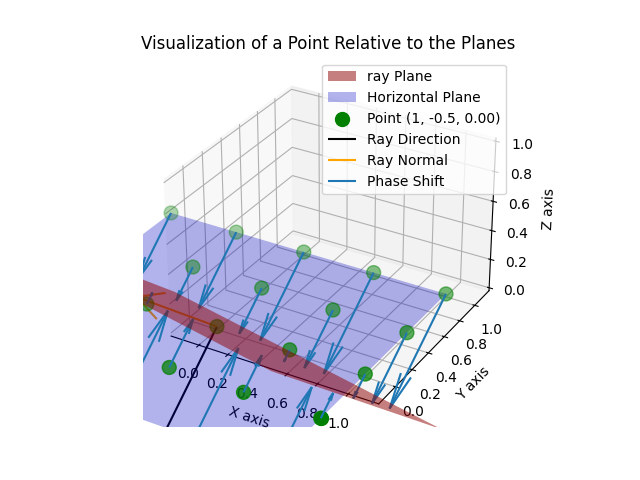

In [3]:
# Define the plane equation parameters A, B, C, D for the ray
A, B, C, D = 0.1, 0.4, 0.5, 0  # Ax + By + Cz - D = 0

# Ray vector set up
point_ray = np.array([[0, 0, 0]]) # Define the location the ray hits on the detector
v_ray = np.array([[A, B, C]]) # Define it's direction vector from the plane equation above
v_mag_ray = np.sqrt(A**2 + B**2 + C**2) # Get magnitude
v_unit_ray = -v_ray / np.linalg.norm(v_mag_ray) # Normalise

# Basis vectors e1 and e2
e1 = np.array([1, 0, 0])

# Calculate cross product with e1 and e2
cross_product_e1 = np.cross(v_unit_ray, e1)
v_unit_ray_norm = cross_product_e1

# Create a grid of x, y values
x = np.linspace(-1, 1, 5)
y = np.linspace(-1, 1, 5)
xx, yy = np.meshgrid(x, y)

# Solve for z from the plane equation
zz = (D - A * xx - B * yy) / C

zz_zero = np.zeros_like(zz)

# Create the plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.axis('equal')

# Plot the ray plane
ax.plot_surface(xx, yy, zz, alpha=0.5, rstride=100, cstride=100, color='r', label='ray Plane')

# Plot the horizontal detector plane
ax.plot_surface(xx, yy, zz_zero, alpha=0.3, rstride=100, cstride=100, color='b', label='Horizontal Plane')

# Define a specific point (example point on detector)
px, py = 1, -0.5
pz = 0

# Plot the point
ax.scatter([px], [py], [pz], color='g', s=100, label=f'Point ({px}, {py}, {pz:.2f})')
point_det = np.array([[px, py, pz]])

# Plot the point
ax.scatter(xx.ravel(), yy.ravel(), zz_zero.ravel(), color='g', s=100)

points = np.vstack([xx.ravel(), yy.ravel(), zz_zero.ravel()]).T

v = point_ray - points
dist = np.dot(v, v_unit_ray.T)
rejections = dist*v_unit_ray

ax.quiver(0, 0, 0, v_unit_ray[0, 0], v_unit_ray[0, 1], v_unit_ray[0, 2], color = 'black', label = 'Ray Direction')
ax.quiver(0, 0, 0, v_unit_ray_norm[0, 0], v_unit_ray_norm[0, 1], v_unit_ray_norm[0, 2], color = 'orange', label = 'Ray Normal')
ax.quiver(points[:, 0], points[:, 1], points[:, 2], rejections[:, 0], rejections[:, 1], rejections[:, 2], label = 'Phase Shift')

# Labels and title
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('Visualization of a Point Relative to the Planes')

# Legend
ax.legend()



Blue plane is detector - Red plane is plane normal to direction of ray. Green dots are pixels. By performing the above calculation, we can work out what at phase the plane wave would be if it had hit each pixel.